In [13]:
import numpy as np
import pandas as pd

import helper_functions 
from helper_functions import *
from imp import reload
import pandas as pd
import data_formatting
from data_formatting import *
reload(helper_functions)
reload(data_formatting)

import plot_workbench
from plot_workbench import plot_workbench
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:

def round_with_padding(value, round_digits):
    return format(round(value,round_digits), "."+str(round_digits)+"f")

csv_path='/home/ubuntu/enigma/motor_predictions/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll_slnm.csv'
nemo_settings='1mm,sdstream'
nemo_path='/home/ubuntu/enigma/lesionmasks/'
results_path='/home/ubuntu/enigma/results/'
analysis_id='analysis_1'
workbench_vis=False
scenesdir='/home/ubuntu/enigma/motor_predictions/wb_files'
hcp_dir='/home/ubuntu/enigma/motor_predictions/wb_files/HCP_S1200_GroupAvg_v1'
wbpath='/home/ubuntu/enigma/motor_predictions/wb_files/workbench_ubuntu/bin_linux64'
chaco_type='chacovol'
atlas='fs86subj'
covariates=['AGE','SEX','DAYS_POST_STROKE']
boxplots=False
lesionload_types='M1,all,all_2h'
crossval_types='1'
verbose=0
nperms=100
save_models=True
ensembles='none'
subid_colname='BIDS_ID'
ensemble_atlas='fs86subj'
site_colname='SITE'
chronicity_colname='CHRONICITY'
yvar_colname='NORMED_MOTOR'
subset='acutechronic'
y_var='normed_motor_scores'
model_specified='ridge'
override_rerunmodels=False
remove_demog=None
ll='M1'
nemo_settings= ['1mm','sdstream']
output_path='analysis_1'
model_tested = 'ridge_nofeatselect'
crossval='1'
original_dataset = load_csv(csv_path)
return_motor= True

[X, Y, C, lesion_load, site,site_idx, lesionvol,motor_vars] = create_data_set(csv_path, site_colname, nemo_path,yvar_colname, subid_colname,chronicity_colname,atlas, covariates, verbose, y_var,chaco_type, subset, remove_demog , nemo_settings, ll,return_motor)
subset='chronic'

[X_chronic, Y, C, lesion_load, site,site_idx, lesionvol,motor_vars] = create_data_set(csv_path, site_colname, nemo_path,yvar_colname, subid_colname,chronicity_colname,atlas, covariates, verbose, y_var,chaco_type, subset, remove_demog , nemo_settings, ll,return_motor)
subset='acute'

[X_acute, Y, C, lesion_load, site,site_idx, lesionvol,motor_vars] = create_data_set(csv_path, site_colname, nemo_path,yvar_colname, subid_colname,chronicity_colname,atlas, covariates, verbose, y_var,chaco_type, subset, remove_demog , nemo_settings, ll,return_motor)

file ='meanbetas_allperms_99'

textfile = os.path.join(results_path, output_path, '{}_{}_{}_{}_{}_crossval{}_{}.txt'.format(atlas, y_var, chaco_type, subset, model_tested,crossval, file))
X = np.concatenate((X_chronic, X_acute))



Loading .csv...
/home/ubuntu/enigma/motor_predictions/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll_slnm.csv

Size of dataset before removing subjects without outcome scores: 1068 subjects
Size of dataset after removing subjects without outcome scores: 1020 subjects


Size of dataset before removing subjects without non-lesion covariates ['AGE', 'SEX', 'DAYS_POST_STROKE']: 1020 subjects
Size of dataset after removing subjects without non-lesion covariates: 792 subjects

Size of dataset before subsetting for chronic/acute: 791 subjects

Selecting chronic subjects only.

Size of dataset after subsetting for chronic/acute: 462 subjects
fs86subj
chacovol

The following subjects are in the .csv file but do not have corresponding ChaCo data: []

(462, 86)
Index(['Unnamed: 0', 'BIDS_ID', 'SES', 'SITE', 'AGE', 'SEX',
       'DAYS_POST_STROKE', 'CHRONICITY', 'CHRONIC', 'ACUTE',
       'LESIONED_HEMISPHERE', 'NORMED_MOTOR', 'NORMED_MOTOR_ACUTE',
       'NORMED_MOTOR_CHRONIC', 'FUGL_ME

(array([11., 11., 21.,  3.,  7.,  8.,  8., 11.,  4.,  2.]),
 array([0.02449058, 0.04795007, 0.07140955, 0.09486904, 0.11832853,
        0.141788  , 0.1652475 , 0.18870698, 0.21216647, 0.23562595,
        0.25908545], dtype=float32),
 <BarContainer object of 10 artists>)

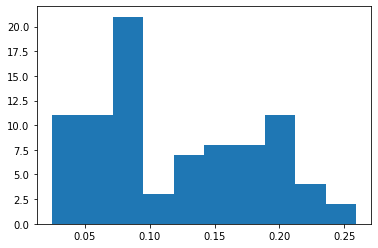

In [29]:
sum_of_ChaCo = np.sum(X,axis=0)
mean_of_ChaCo = np.mean(X,axis=0)
std_chaco = np.std(X, axis=0)


sum_of_ChaCo.shape
mean_of_ChaCo.shape

np.savetxt('/home/ubuntu/enigma/motor_predictions/mean_ChaCo.txt', mean_of_ChaCo)
np.savetxt('/home/ubuntu/enigma/motor_predictions/sum_of_ChaCo_chronic_fs.txt', sum_of_ChaCo)
np.savetxt('/home/ubuntu/enigma/motor_predictions/std_ChaCo.txt', std_chaco)


plt.hist(std_chaco)

0.024490578
0.25908545


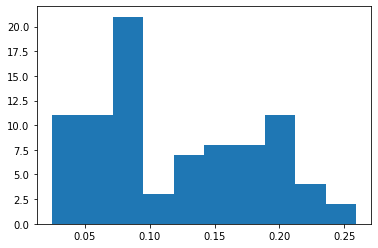

In [31]:
plt.hist(std_chaco)
print(np.min(std_chaco))
print(np.max(std_chaco))


test 2
(268,)
saving
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/temp_subcortical_fig.png
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/temp_surfaces_fig.png
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/temp_dorsalsurfaces_fig.png


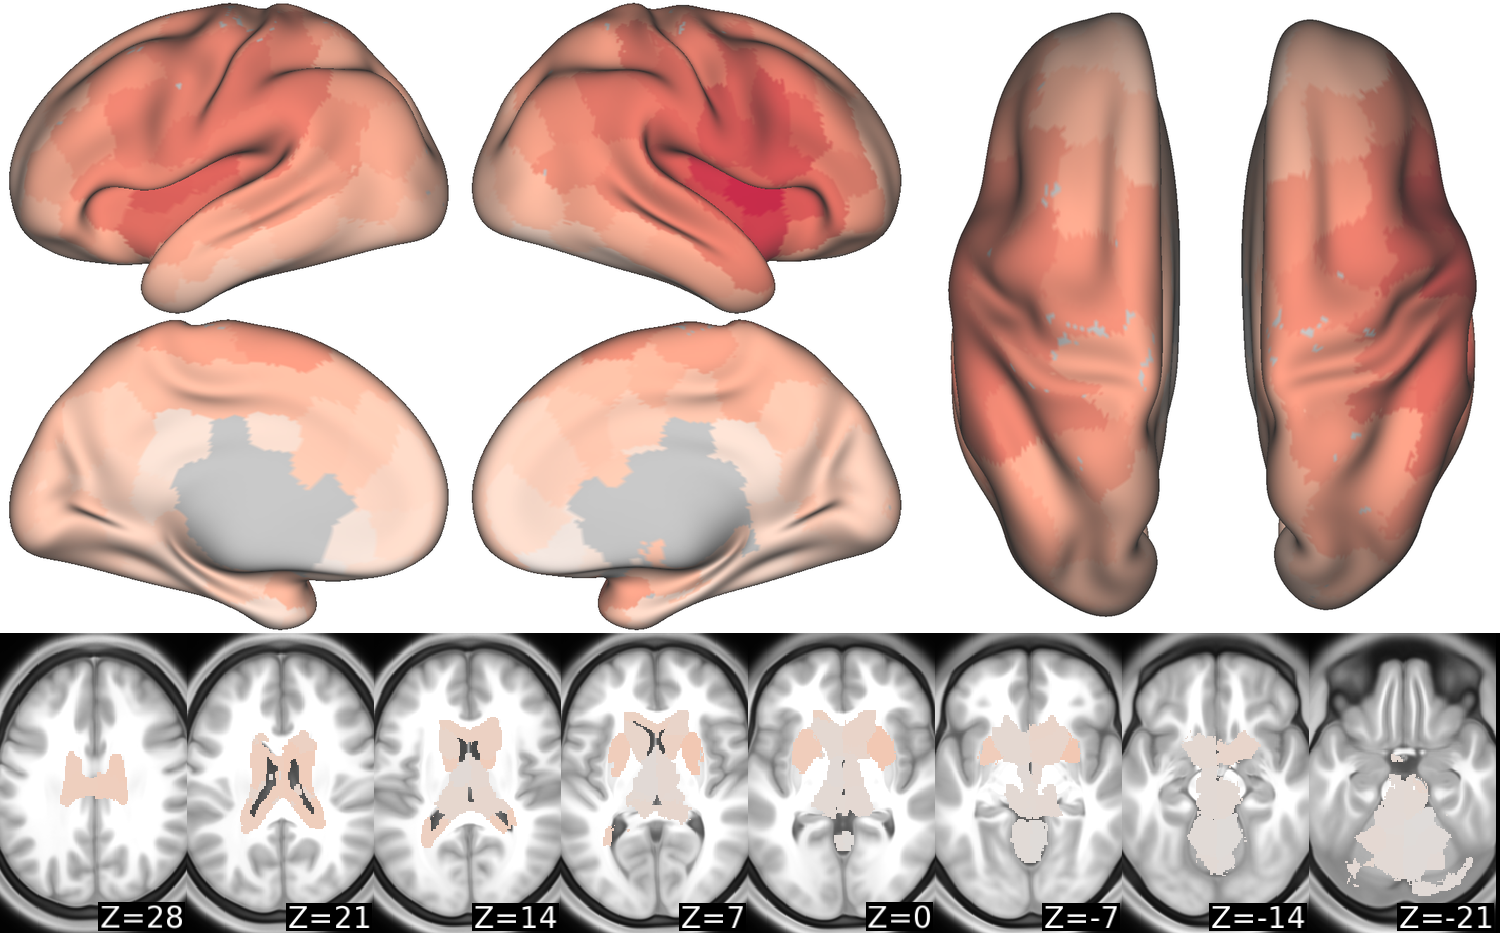

In [21]:
std_figure = plot_workbench('/home/ubuntu/enigma/motor_predictions/std_ChaCo.txt', 5.8)

std_figure.save('/home/ubuntu/enigma/motor_predictions/std_chaco_max03.png')
std_figure

test 2
(268,)
saving
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/temp_subcortical_fig.png
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/temp_surfaces_fig.png
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/temp_dorsalsurfaces_fig.png


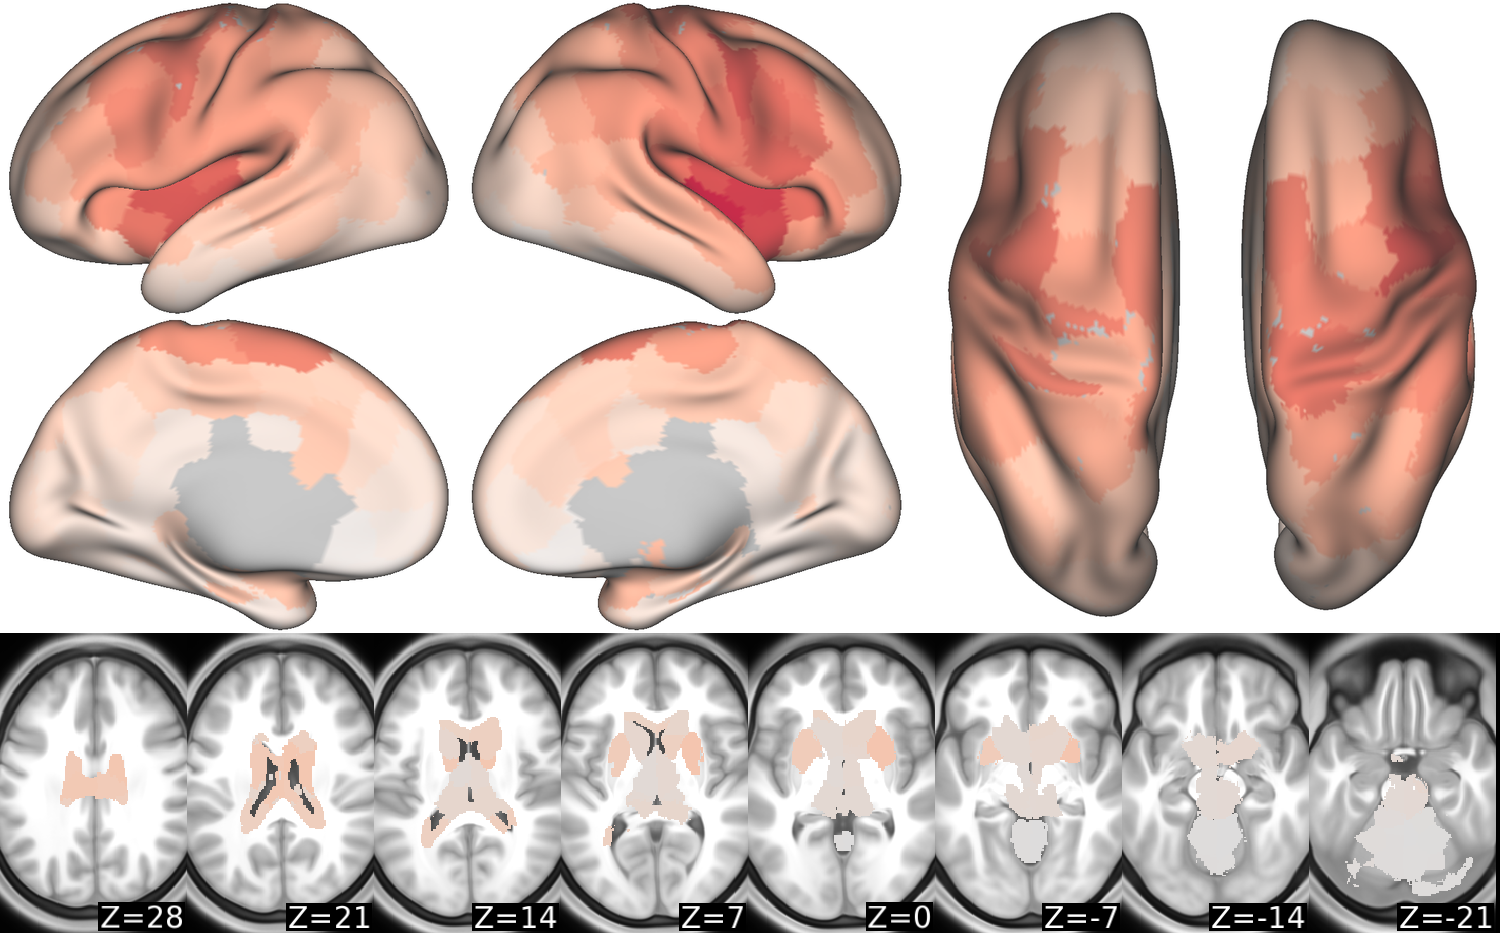

In [22]:
mean_figure = plot_workbench('/home/ubuntu/enigma/motor_predictions/mean_ChaCo.txt', 2.8)

mean_figure.save('/home/ubuntu/enigma/motor_predictions/mean_chaco_max018.png')
mean_figure

In [18]:
shen_labels = pd.read_csv('/home/ubuntu/enigma/motor_predictions/shen_network_new.csv')
hemisphere = shen_labels['Hemisphere']
lobe= shen_labels['Lobe']
network = shen_labels['Shen2Yeo']
network.shape

(268,)

In [19]:
vars = np.loadtxt(textfile)

negs = vars <0
pos = vars > 0

(60, 60)


<Figure size 2160x1440 with 0 Axes>

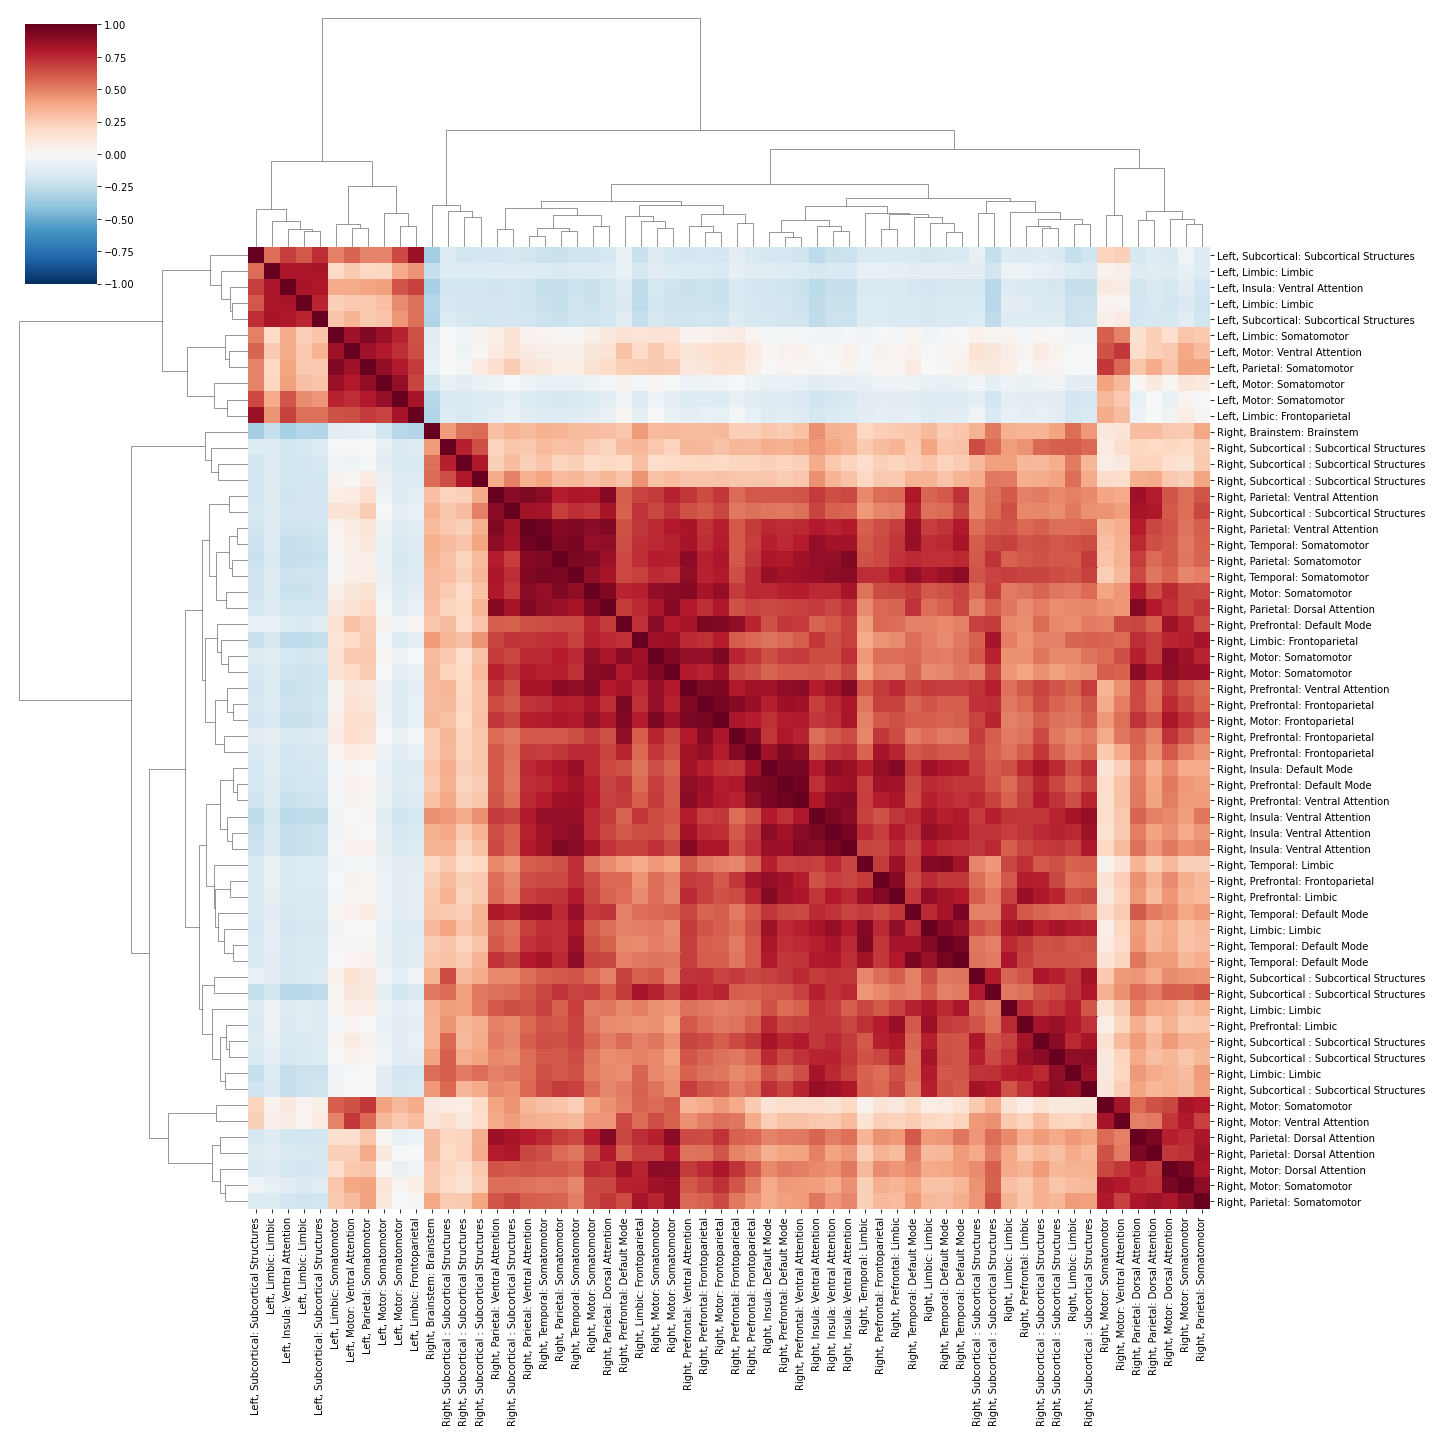

In [20]:
import seaborn as sns 
from sklearn.decomposition import PCA

vars = np.loadtxt(textfile)


labels = hemisphere + ', ' + lobe + ': ' + network
neg = vars < 0
pos = vars > 0
zer = vars == 0 

selected = neg + pos 

negs = X[:,selected]
labels_subset = labels[selected]

print(np.cov(np.transpose(negs)).shape)

plt.figure(figsize=(30,20))
g = sns.clustermap(np.corrcoef(np.transpose(negs)), cmap='RdBu_r',vmin=-1,vmax=1, xticklabels=labels_subset,yticklabels=labels_subset,figsize=(20,20))
plt.savefig("/home/ubuntu/enigma/results/heatmap_shen268_correlation.png") 




(43, 43)


<Figure size 2160x1440 with 0 Axes>

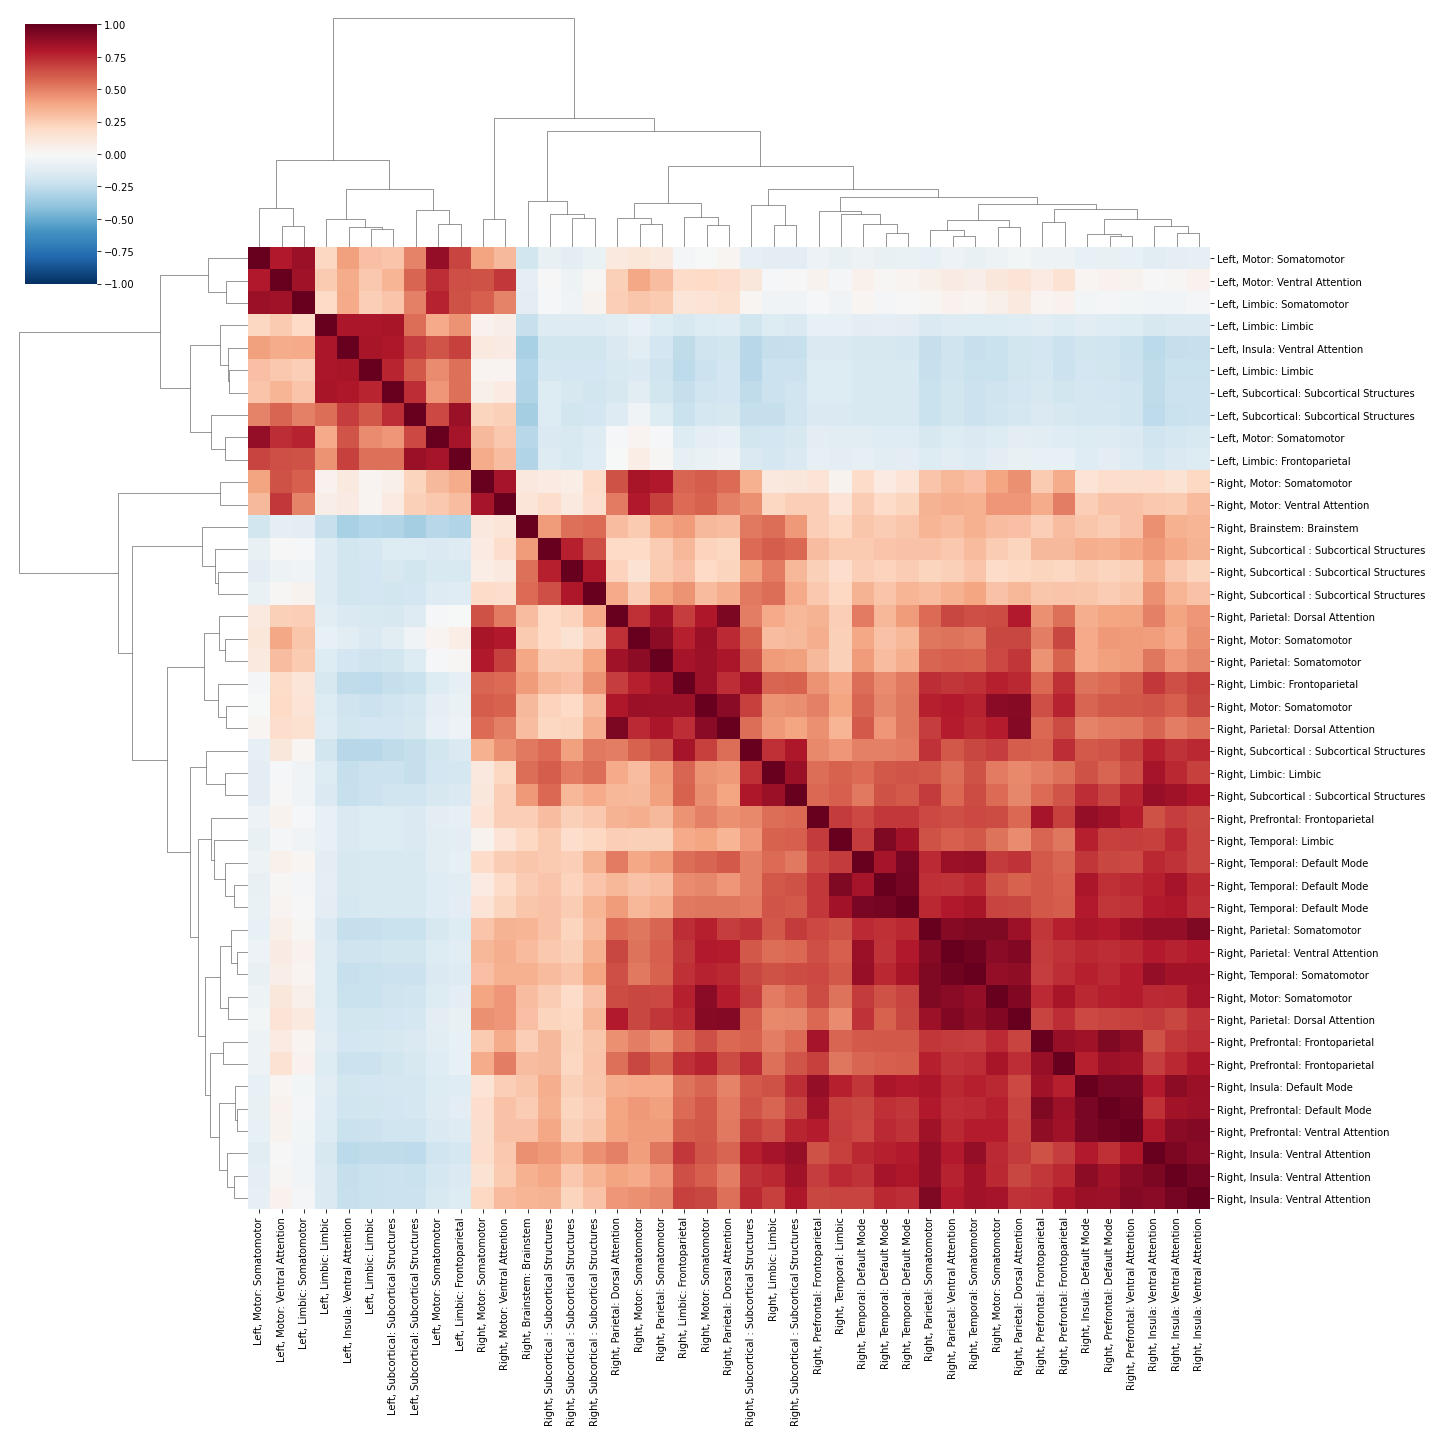

In [21]:

negs = X[:,neg]
labels_subset = labels[neg]

print(np.cov(np.transpose(negs)).shape)

plt.figure(figsize=(30,20))
g = sns.clustermap(np.corrcoef(np.transpose(negs)), cmap='RdBu_r',vmin=-1,vmax=1, xticklabels=labels_subset,yticklabels=labels_subset,figsize=(20,20))
plt.savefig("/home/ubuntu/enigma/results/heatmap_shen268_correlation_negs.png") 




(36, 36)


<Figure size 2160x1440 with 0 Axes>

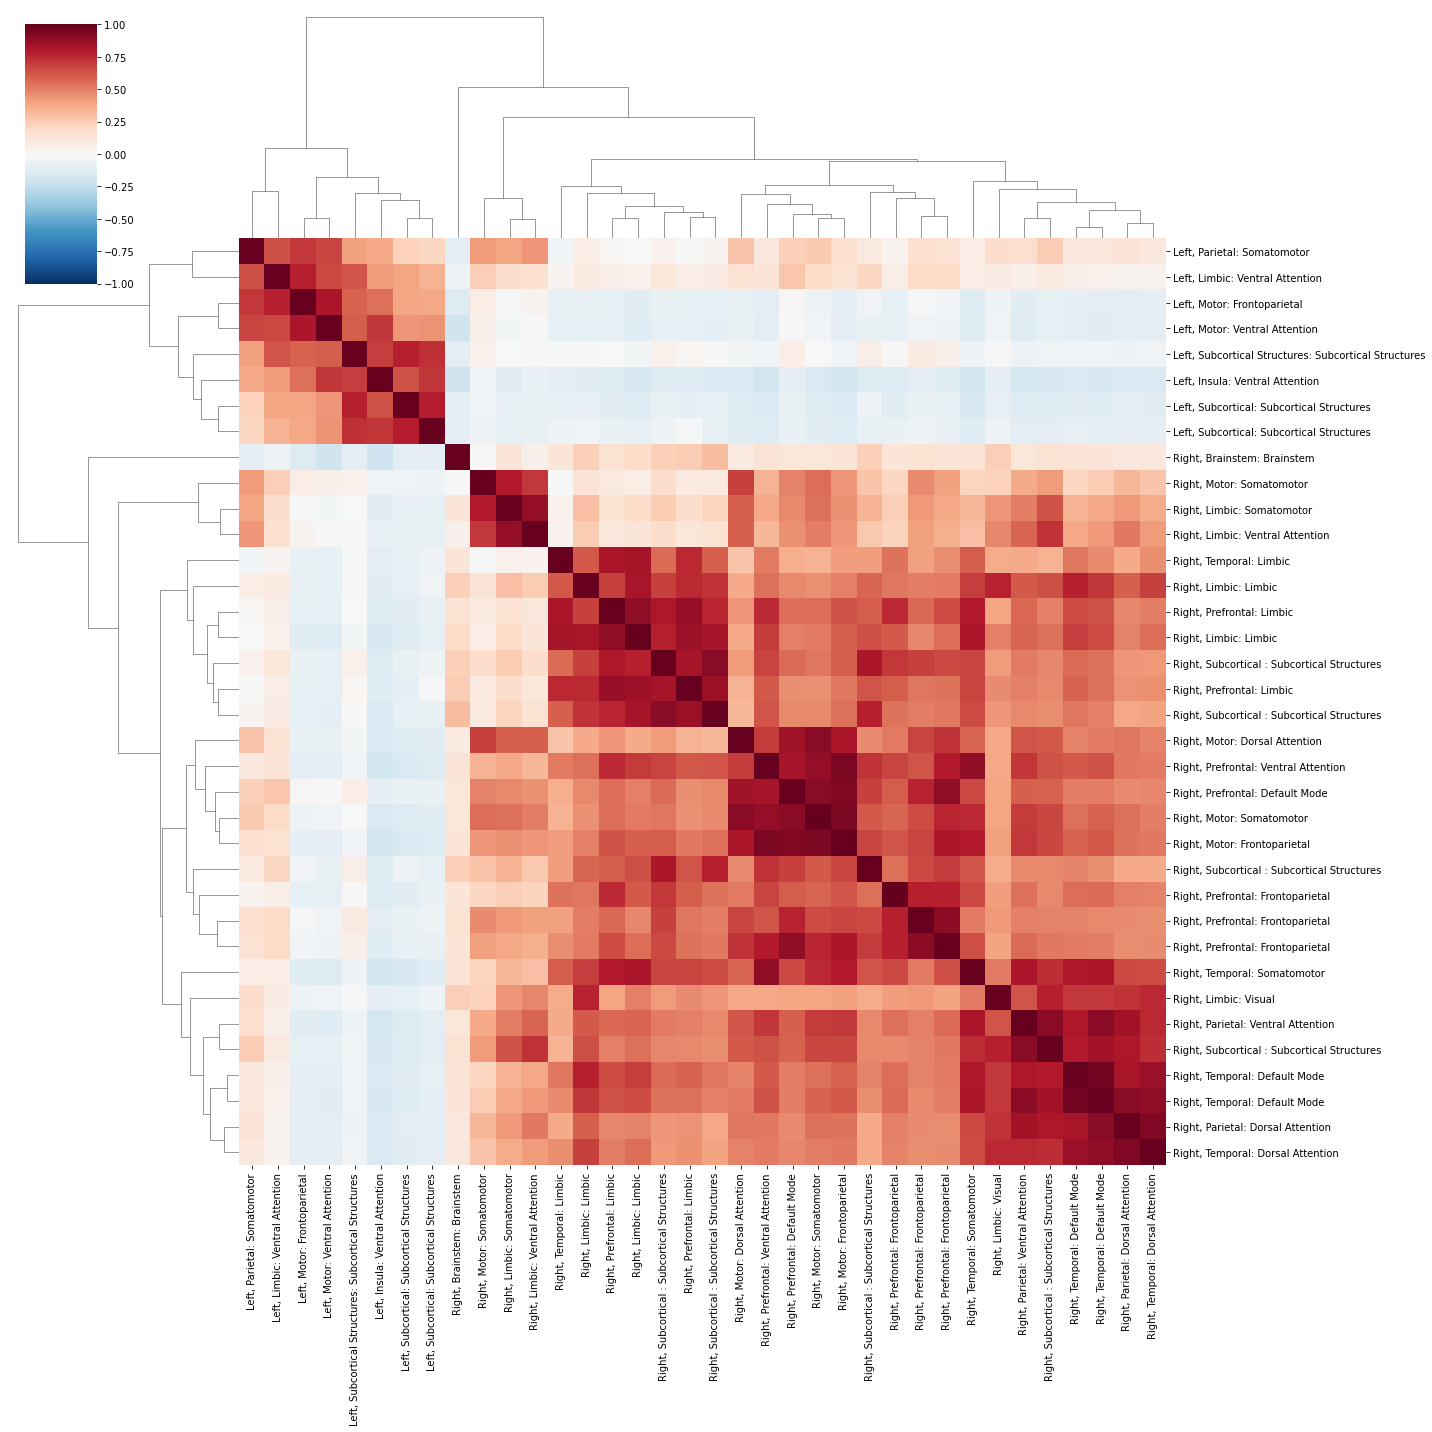

In [ ]:

negs = X[:,pos]
labels_subset = labels[pos]

plt.figure(figsize=(30,20))
g = sns.clustermap(np.corrcoef(np.transpose(negs)), cmap='RdBu_r',vmin=-1,vmax=1, xticklabels=labels_subset,yticklabels=labels_subset,figsize=(20,20))
plt.savefig("/home/ubuntu/enigma/results/heatmap_shen268_correlation_poss.png") 




<Figure size 2160x1440 with 0 Axes>

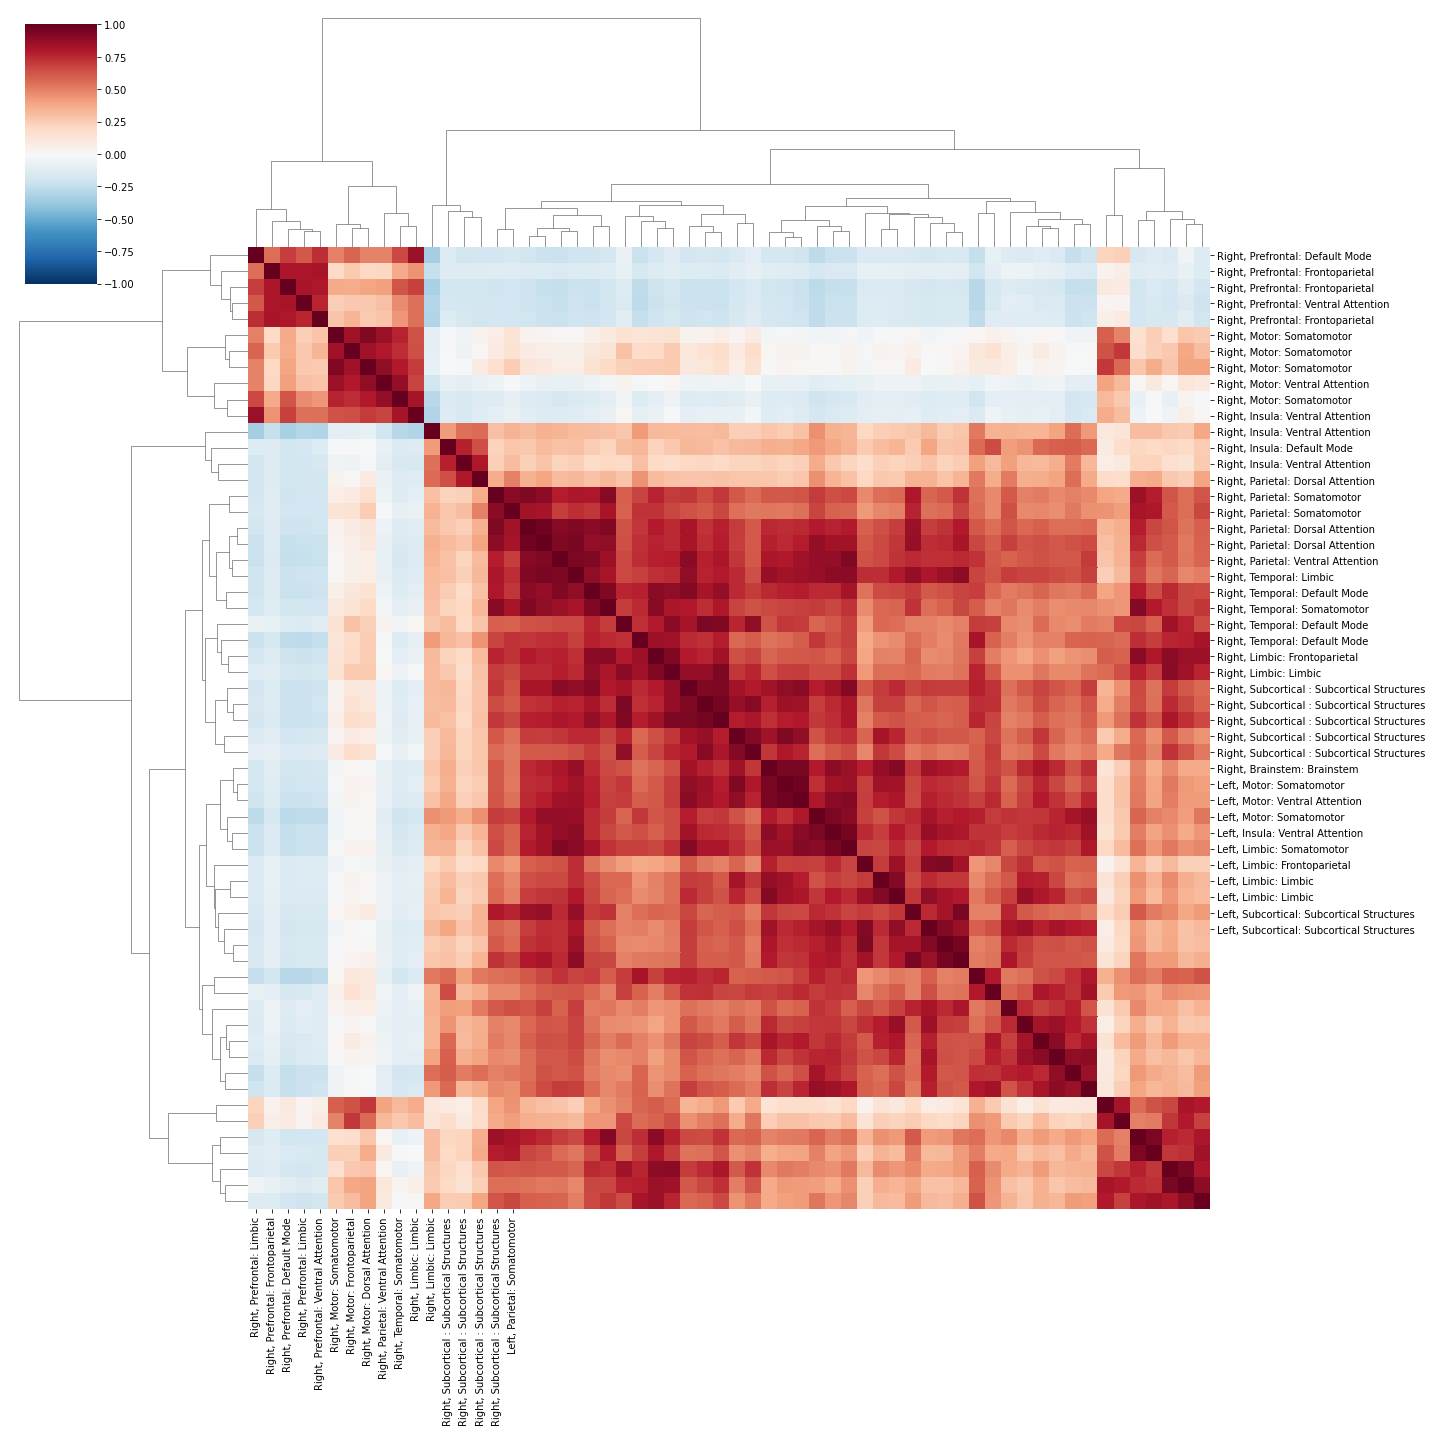

In [59]:

negs = X[:,neg]
poss = X[:,pos]
labels_subset_pos = labels[pos]
labels_subset_neg = labels[neg]

plt.figure(figsize=(30,20))
g = sns.clustermap(np.corrcoef(np.transpose(negs),np.transpose(poss)), cmap='RdBu_r',vmin=-1,vmax=1, xticklabels=labels_subset_pos,yticklabels=labels_subset_neg,figsize=(20,20))
plt.savefig("/home/ubuntu/enigma/results/heatmap_shen268_correlation_pos_vs_neg.png") 




In [86]:
negs = X[:,neg]
print(negs.shape)
poss = X[:,pos]
print(poss.shape)


correls = np.zeros(shape = ( negs.shape[1],  poss.shape[1]))
print(correls.shape)
for i in range(0,negs.shape[1]):
    for j in range(0, poss.shape[1]):
        correls[i,j]=np.corrcoef(negs[:,i],poss[:,j])[0][1]


(462, 43)
(462, 17)
(43, 17)


<Figure size 2160x1440 with 0 Axes>

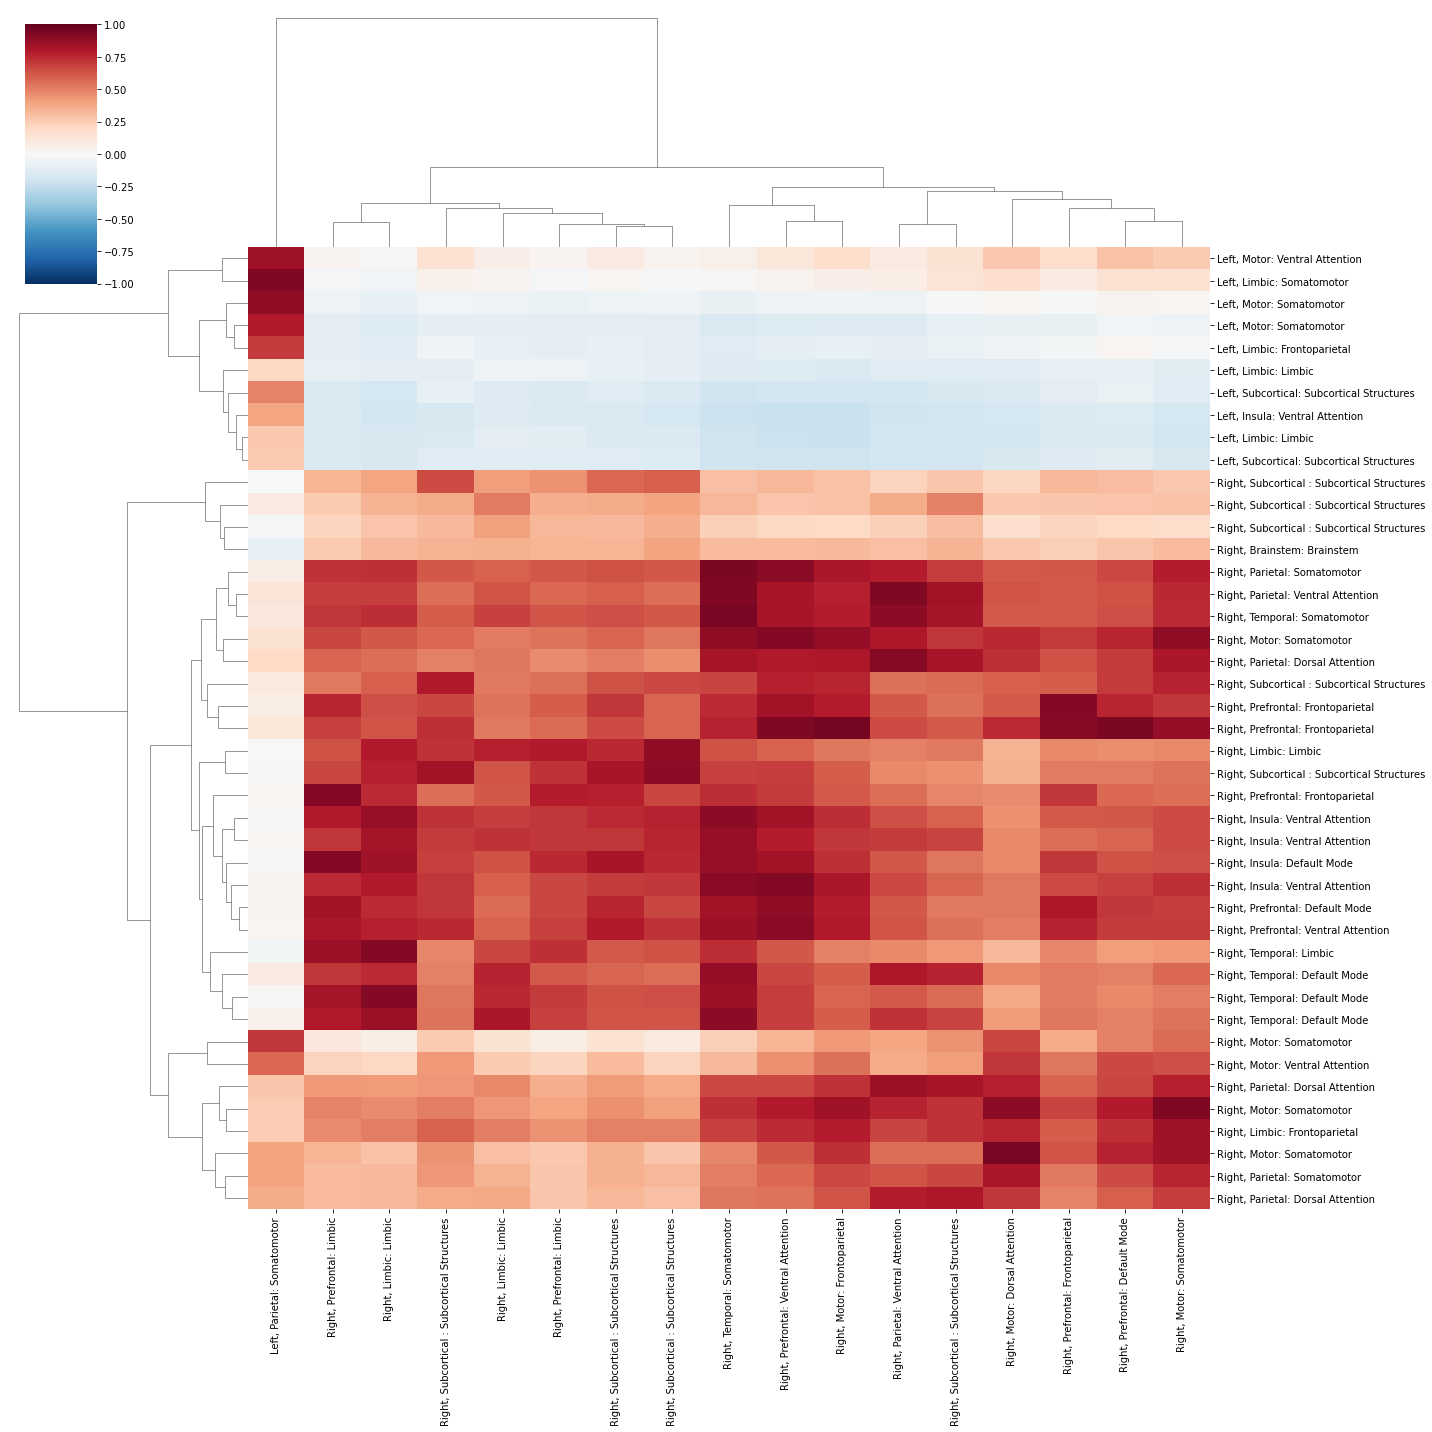

In [87]:

plt.figure(figsize=(30,20))
g = sns.clustermap(correls, cmap='RdBu_r',vmin=-1,vmax=1, xticklabels=labels_subset_pos,yticklabels=labels_subset_neg,figsize=(20,20))
plt.savefig("/home/ubuntu/enigma/results/heatmap_shen268_correlation_pos_vs_neg.png") 



In [57]:
import nibabel as nib
import nibabel.processing

results_path='/home/ubuntu/enigma/results/'
scenesdir='/home/ubuntu/enigma/motor_predictions/wb_files'

atlas_dir = scenesdir 

hcp_dir='/home/ubuntu/enigma/motor_predictions/wb_files/HCP_S1200_GroupAvg_v1'

textfiles_betas = ['meanbetas_allperms_100','meanbetas_allperms_50']

textfile = '/home/ubuntu/enigma/motor_predictions/sum_of_ChaCo_chronic_fs.txt'


# load text file in fs86 parc (86,1) vector/shen268 parc (268,1)
scalar = np.genfromtxt(textfile, dtype = "float32", delimiter = ',', usecols = 0)
 # freesurfer86 region
if scalar.shape[0]==86:
    factor = np.max(scalar)/0.05
    scalar=scalar/factor # dislpay range: 0 - 0.05

    # 42/0.05 = 840
    
    # fs86 parcellation - surface files
    atlas_file = nib.load(os.path.join(atlas_dir,'fs86_dil1_allsubj_mode.nii.gz')).get_fdata()
    nodes = np.unique(atlas_file)
    
    nodes = np.delete(nodes,0)
    data = np.zeros(atlas_file.shape, dtype=np.float32)
    for i,n in enumerate(nodes):
        if n<18:
            continue
        data[atlas_file == n] = scalar[i]
        
    sample_img = nib.load(os.path.join(atlas_dir,'fs86_dil1_allsubj_mode.nii.gz'))
    save_file ='/home/ubuntu/enigma/motor_predictions/fs_surface_betas_test.nii.gz'
    
    # store nifti header info for saving file
    save_img = nib.Nifti1Image(data, sample_img.affine, sample_img.header)
    
    save_img.set_data_dtype(data.dtype)
    
    nib.save(save_img, save_file) 
    
    filename = save_file
    surf_prefix = filename.replace('.nii.gz', '')
    
    for hemi in ['L', 'R']:
        os.chdir(wbpath) 
        cmd = './wb_command' + ' -volume-to-surface-mapping '+  filename + ' ' + hcp_dir + '/S1200.' + hemi + '.midthickness_MSMAll.32k_fs_LR.surf.gii '+ surf_prefix + hemi + '.shape.gii -enclosing'
        os.system(cmd)

        #cmd = './wb_command -metric-dilate ' + surf_prefix + hemi + '.shape.gii' + ' ' + hcp_dir + '/S1200.' + hemi + '.midthickness_MSMAll.32k_fs_LR.surf.gii 20 ' + surf_prefix + hemi + '_filled.shape.gii -nearest'
        #os.system(cmd)

    os.remove(surf_prefix + '.nii.gz')
    
    
    # fs86 parcellation - subcortical volume ------------
    os.chdir('/home/ubuntu/enigma/motor_predictions/wb_files/workbench_ubuntu')

    roivol = nib.load(os.path.join(atlas_dir,'fs86_dil1_allsubj_mode.nii.gz'))
    Vroi = roivol.get_fdata()
    Vnew = np.zeros(Vroi.shape)
    roidata = np.genfromtxt( textfile, dtype = "float32", delimiter = ',', usecols = 0)
    roidata=roidata/factor
    for i,v in enumerate(np.unique(Vroi[Vroi>0])):
        Vnew[Vroi == v] = roidata[i]
    imgnew = nib.Nifti1Image(Vnew, affine = roivol.affine, header = roivol.header)
    
    nib.save(imgnew, "subcortical_volumes.nii.gz")
    datapath =  "subcortical_volumes.nii.gz"
    newdata = nib.load("subcortical_volumes.nii.gz")
    
    cc400 = nib.load(os.path.join(atlas_dir,'fs86_dil1_allsubj_mode.nii.gz'))
    atlas2 = nib.load(os.path.join(atlas_dir,'fs86_dil1_allsubj_mode_subcort.nii.gz'))
    
    atlas1=nibabel.processing.resample_from_to(atlas2, cc400, order=0)
    
    V400 = cc400.get_fdata()
    V1 = atlas1.get_fdata()
    
    subcortvals = np.unique(V400[(V400>0) * (V1>0)])
    V400_subcort = V400 * np.isin(V400,subcortvals)
            
    imgdata = newdata.get_fdata()            
    Vnew = np.double(imgdata*(V400_subcort>0))
    
    cc400.header.set_data_dtype(np.float64)  # without this the visualization breaks. LOVE IT!
    
    newdata_subcort=nib.Nifti1Image(Vnew, affine=cc400.affine, header=cc400.header)

    save_file ='/home/ubuntu/enigma/motor_predictions/fs86_subcortical_betas.nii.gz'
    print('saving betas file: {}'.format(save_file))
    nib.save(newdata_subcort, save_file)
    
elif scalar.shape[0]==268:

    factor = np.max(scalar)/0.05
    scalar=scalar/factor # dislpay range: 0 - 0.
    # 75/0.05 = 1500

    # It first loads the scalar data from the text file, and then loads the atlas file for the shen268 parcellation. 
    atlas_file = nib.load(os.path.join(atlas_dir, 'shen268_MNI1mm_dil1.nii.gz')).get_fdata()
    subcorticalshen = np.loadtxt(os.path.join(atlas_dir, 'shen_subcorticalROIs.txt'))

    # It then creates an array of nodes by extracting the unique values from the atlas file and removing the value 0. 
    # The code then creates an empty array of data with the same shape as the atlas file.    
    # It then iterates over the nodes, and if the node is not in the list of subcortical regions, it assigns the corresponding
    # value in the scalar array to the data array.    
    nodes = np.unique(atlas_file)
    nodes = np.delete(nodes,0)
    data = np.zeros(atlas_file.shape, dtype=np.float32)
    for i,n in enumerate(nodes):
        if n in subcorticalshen:
            continue
        data[atlas_file == n] = scalar[i]
        
    sample_img = nib.load(os.path.join(atlas_dir, 'shen268_MNI1mm_dil1.nii.gz'))
    save_file ='/home/ubuntu/enigma/motor_predictions/shen_surface_betas_test.nii.gz'

    # store nifti header info for saving file
    save_img = nib.Nifti1Image(data, sample_img.affine, sample_img.header)

    save_img.set_data_dtype(data.dtype)

    nib.save(save_img, save_file) 

    filename = save_file
    surf_prefix = filename.replace('.nii.gz', '')

    for hemi in ['L', 'R']: 
        os.chdir(wbpath)
        cmd = './wb_command' + ' -volume-to-surface-mapping '+  filename + ' ' + hcp_dir + '/S1200.' + hemi + '.midthickness_MSMAll.32k_fs_LR.surf.gii '+ surf_prefix + hemi + '.shape.gii -enclosing'
        os.system(cmd)

    os.remove(surf_prefix + '.nii.gz')

    # fs86 parcellation - subcortical volume ------------
    os.chdir('/home/ubuntu/enigma/motor_predictions/wb_files/workbench_ubuntu')

    roivol = nib.load(os.path.join(atlas_dir, 'shen268_MNI1mm_dil1.nii.gz'))
    Vroi = roivol.get_fdata()
    Vnew = np.zeros(Vroi.shape)

    roidata = np.genfromtxt( textfile, dtype = "float32", delimiter = ',', usecols = 0)
    roidata = roidata/factor
    for i,v in enumerate(np.unique(Vroi[Vroi>0])):
        Vnew[Vroi == v] = roidata[i]
    imgnew = nib.Nifti1Image(Vnew, affine = roivol.affine, header = roivol.header)

    nib.save(imgnew, "subcortical_volumes.nii.gz")
    datapath =  "subcortical_volumes.nii.gz"
    newdata = nib.load("subcortical_volumes.nii.gz")

    cc400 = nib.load(os.path.join(atlas_dir, 'shen268_MNI1mm_dil1.nii.gz'))
    atlas2 = nib.load(os.path.join(atlas_dir, 'shen268_MNI1mm_dil1_subcort.nii'))

    atlas1=nibabel.processing.resample_from_to(atlas2, cc400, order=0)

    V400 = cc400.get_fdata()
    V1 = atlas1.get_fdata()

    subcortvals = np.unique(V400[(V400>0) * (V1>0)])
    V400_subcort = V400 * np.isin(V400,subcortvals)
            
    imgdata = newdata.get_fdata()            
    Vnew = np.double(imgdata*(V400_subcort>0))

    cc400.header.set_data_dtype(np.float64)  # without this the visualization breaks. LOVE IT!

    newdata_subcort=nib.Nifti1Image(Vnew, affine=cc400.affine, header=cc400.header)

    save_file ='/home/ubuntu/enigma/motor_predictions/shen_subcortical_betas.nii.gz'

    nib.save(newdata_subcort, save_file)


In [58]:
import shutil


subcortical_file ='/home/ubuntu/enigma/motor_predictions/shen_subcortical_betas.nii.gz'
surface_fileL = '/home/ubuntu/enigma/motor_predictions/shen_surface_betas_testL.shape.gii'
surface_fileR ='/home/ubuntu/enigma/motor_predictions/shen_surface_betas_testR.shape.gii'

# because workbench is sooo intuitive, palette/visualization settings are stored in the nifti/gifti metadata!
# have to rewrite the nifti files with nifti header info derived from manually setting the palette in workbench.
niftimeta = nib.load(os.path.join(scenesdir, 'niftimetadata_POSNEG.nii.gz'))
newsubcortfile = nib.Nifti1Image(nib.load(subcortical_file).get_fdata(), niftimeta.affine, niftimeta.header)
nib.save(newsubcortfile, subcortical_file)

#workbench changes the dataarray metadata.
# keep the metadata for reference gifti, replace with data from actual feature file
giftimetaR = nib.load(os.path.join(scenesdir, 'surfmetadataR_posneg.shape.gii')) # reference gifti
giftimetaR.darrays[0].data = nib.load(surface_fileR).darrays[0].data
newgifti = nib.gifti.gifti.GiftiImage(header=giftimetaR.header, extra=None, file_map = giftimetaR.file_map, labeltable=giftimetaR.labeltable, darrays=giftimetaR.darrays, meta = giftimetaR.meta, version='1.0')
nib.save(newgifti, surface_fileR)

giftimetaL = nib.load(os.path.join(scenesdir,'surfmetadataR_posneg.shape.gii')) # reference gifti
giftimetaL.darrays[0].data = nib.load(surface_fileL).darrays[0].data
newgifti = nib.gifti.gifti.GiftiImage(header=giftimetaL.header, extra=None, file_map = giftimetaL.file_map, labeltable=giftimetaL.labeltable, darrays=giftimetaL.darrays, meta = giftimetaL.meta, version='1.0')
nib.save(newgifti, surface_fileL)

        
# make copy of the scenes file that we modify for each figure.
shutil.copy(os.path.join(scenesdir,'subcort_scene_edit.scene'), os.path.join(results_path,analysis_id,'subcortical_scene.scene'))
shutil.copy(os.path.join(scenesdir,'subcort_scene_edit.scene'), os.path.join(results_path,analysis_id,'subcortical_scene_pos.scene'))

shutil.copy(os.path.join(scenesdir,'landscape_surfaces_edit.scene'), os.path.join(results_path,analysis_id,'surfaces_scene.scene')) 
shutil.copy(os.path.join(scenesdir,'landscape_surfaces_edit.scene'), os.path.join(results_path,analysis_id,'surfaces_scene_pos.scene')) 

shutil.copy(os.path.join(scenesdir,'dorsal_surface_edit.scene'), os.path.join(results_path,analysis_id,'dorsalsurfaces_scene.scene')) 
shutil.copy(os.path.join(scenesdir,'dorsal_surface_edit.scene'), os.path.join(results_path,analysis_id,'dorsalsurfaces_scene_pos.scene')) 

# replace volume/surface files with specific results files.
with open(os.path.join(results_path, analysis_id, 'subcortical_scene.scene'), "r") as f:
    scenefile = f.read()
    scenefile = scenefile.replace('subcortical_volumes.nii.gz',subcortical_file)
with open(os.path.join(results_path, analysis_id, 'subcortical_scene.scene'), 'w') as f:
    f.write(scenefile)


with open(os.path.join(results_path, analysis_id, 'surfaces_scene.scene'), "r") as f:
    scenefile = f.read()
    scenefile = scenefile.replace('surfL.gii',surface_fileL)
    scenefile = scenefile.replace('surfR.gii',surface_fileR)
with open(os.path.join(results_path, analysis_id, 'surfaces_scene.scene'), 'w') as f:
    f.write(scenefile)

with open(os.path.join(results_path, analysis_id, 'surfaces_scene_pos.scene'), 'w') as f:
    f.write(scenefile)  
with open(os.path.join(results_path, analysis_id, 'dorsalsurfaces_scene.scene'), "r") as f:
    scenefile = f.read()
    scenefile = scenefile.replace('surfL.gii',surface_fileL)
    scenefile = scenefile.replace('surfR.gii',surface_fileR)
with open(os.path.join(results_path, analysis_id, 'dorsalsurfaces_scene.scene'), 'w') as f:
    f.write(scenefile)   
 
    
# subcortical scene

figurefile ='/home/ubuntu/enigma/motor_predictions/shen_subcortical.png'
scenefile = os.path.join(results_path, analysis_id,'subcortical_scene.scene')
print('Generating workbench figures:\n {}'.format(figurefile))
os.system('bash {}/wb_command -show-scene {} 1 {} 1500 300'.format(wbpath, scenefile, figurefile))

# surface scene2

figurefile ='/home/ubuntu/enigma/motor_predictions/shen_surfacefile.png'
scenefile = os.path.join(results_path, analysis_id,'surfaces_scene.scene')
print('Generating workbench figures:\n {}'.format(figurefile))
os.system('bash {}/wb_command -show-scene {} 1 {} 1300 900'.format(wbpath, scenefile, figurefile))

surface_fileL ='/home/ubuntu/enigma/motor_predictions/shen_surface_betasL.shape.gii'

figurefile ='/home/ubuntu/enigma/motor_predictions/shen_dorsalfile.png'
scenefile = os.path.join(results_path, analysis_id,'dorsalsurfaces_scene.scene')
print('Generating workbench figures:\n {}'.format(figurefile))
os.system('bash {}/wb_command -show-scene {} 1 {} 10000 1300'.format(wbpath, scenefile, figurefile))


Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/shen_subcortical.png
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/shen_surfacefile.png
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/shen_dorsalfile.png


0

In [54]:

subcortical_file ='/home/ubuntu/enigma/motor_predictions/fs86_subcortical_betas.nii.gz'
surface_fileL = '/home/ubuntu/enigma/motor_predictions/fs_surface_betas_testL.shape.gii'
surface_fileR ='/home/ubuntu/enigma/motor_predictions/fs_surface_betas_testR.shape.gii'

# because workbench is sooo intuitive, palette/visualization settings are stored in the nifti/gifti metadata!
# have to rewrite the nifti files with nifti header info derived from manually setting the palette in workbench.
niftimeta = nib.load(os.path.join(scenesdir, 'niftimetadata_POSNEG.nii.gz'))
newsubcortfile = nib.Nifti1Image(nib.load(subcortical_file).get_fdata(), niftimeta.affine, niftimeta.header)
nib.save(newsubcortfile, subcortical_file)

#workbench changes the dataarray metadata.
# keep the metadata for reference gifti, replace with data from actual feature file
giftimetaR = nib.load(os.path.join(scenesdir, 'surfmetadataR_posneg.shape.gii')) # reference gifti
giftimetaR.darrays[0].data = nib.load(surface_fileR).darrays[0].data
newgifti = nib.gifti.gifti.GiftiImage(header=giftimetaR.header, extra=None, file_map = giftimetaR.file_map, labeltable=giftimetaR.labeltable, darrays=giftimetaR.darrays, meta = giftimetaR.meta, version='1.0')
nib.save(newgifti, surface_fileR)

giftimetaL = nib.load(os.path.join(scenesdir,'surfmetadataR_posneg.shape.gii')) # reference gifti
giftimetaL.darrays[0].data = nib.load(surface_fileL).darrays[0].data
newgifti = nib.gifti.gifti.GiftiImage(header=giftimetaL.header, extra=None, file_map = giftimetaL.file_map, labeltable=giftimetaL.labeltable, darrays=giftimetaL.darrays, meta = giftimetaL.meta, version='1.0')
nib.save(newgifti, surface_fileL)

        
# make copy of the scenes file that we modify for each figure.
shutil.copy(os.path.join(scenesdir,'subcort_scene_edit.scene'), os.path.join(results_path,analysis_id,'subcortical_scene.scene'))
shutil.copy(os.path.join(scenesdir,'subcort_scene_edit.scene'), os.path.join(results_path,analysis_id,'subcortical_scene_pos.scene'))

shutil.copy(os.path.join(scenesdir,'landscape_surfaces_edit.scene'), os.path.join(results_path,analysis_id,'surfaces_scene.scene')) 
shutil.copy(os.path.join(scenesdir,'landscape_surfaces_edit.scene'), os.path.join(results_path,analysis_id,'surfaces_scene_pos.scene')) 

shutil.copy(os.path.join(scenesdir,'dorsal_surface_edit.scene'), os.path.join(results_path,analysis_id,'dorsalsurfaces_scene.scene')) 
shutil.copy(os.path.join(scenesdir,'dorsal_surface_edit.scene'), os.path.join(results_path,analysis_id,'dorsalsurfaces_scene_pos.scene')) 

# replace volume/surface files with specific results files.
with open(os.path.join(results_path, analysis_id, 'subcortical_scene.scene'), "r") as f:
    scenefile = f.read()
    scenefile = scenefile.replace('subcortical_volumes.nii.gz',subcortical_file)
with open(os.path.join(results_path, analysis_id, 'subcortical_scene.scene'), 'w') as f:
    f.write(scenefile)


with open(os.path.join(results_path, analysis_id, 'surfaces_scene.scene'), "r") as f:
    scenefile = f.read()
    scenefile = scenefile.replace('surfL.gii',surface_fileL)
    scenefile = scenefile.replace('surfR.gii',surface_fileR)
with open(os.path.join(results_path, analysis_id, 'surfaces_scene.scene'), 'w') as f:
    f.write(scenefile)

with open(os.path.join(results_path, analysis_id, 'surfaces_scene_pos.scene'), 'w') as f:
    f.write(scenefile)  
with open(os.path.join(results_path, analysis_id, 'dorsalsurfaces_scene.scene'), "r") as f:
    scenefile = f.read()
    scenefile = scenefile.replace('surfL.gii',surface_fileL)
    scenefile = scenefile.replace('surfR.gii',surface_fileR)
with open(os.path.join(results_path, analysis_id, 'dorsalsurfaces_scene.scene'), 'w') as f:
    f.write(scenefile)   
 
    
# subcortical scene

figurefile ='/home/ubuntu/enigma/motor_predictions/fs_subcortical.png'
scenefile = os.path.join(results_path, analysis_id,'subcortical_scene.scene')
print('Generating workbench figures:\n {}'.format(figurefile))
os.system('bash {}/wb_command -show-scene {} 1 {} 1500 300'.format(wbpath, scenefile, figurefile))

# surface scene2

figurefile ='/home/ubuntu/enigma/motor_predictions/fs_surfacefile.png'
scenefile = os.path.join(results_path, analysis_id,'surfaces_scene.scene')
print('Generating workbench figures:\n {}'.format(figurefile))
os.system('bash {}/wb_command -show-scene {} 1 {} 1300 900'.format(wbpath, scenefile, figurefile))

surface_fileL ='/home/ubuntu/enigma/motor_predictions/shen_surface_betasL.shape.gii'

figurefile ='/home/ubuntu/enigma/motor_predictions/fs_dorsalfile.png'
scenefile = os.path.join(results_path, analysis_id,'dorsalsurfaces_scene.scene')
print('Generating workbench figures:\n {}'.format(figurefile))
os.system('bash {}/wb_command -show-scene {} 1 {} 10000 1300'.format(wbpath, scenefile, figurefile))

Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/fs_subcortical.png
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/fs_surfacefile.png
Generating workbench figures:
 /home/ubuntu/enigma/motor_predictions/fs_dorsalfile.png


0